In [ ]:
pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.4 MB/s eta 0:00:00
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=ed3b896a95a40337361bf9b5da3d34cae3083fda1ad47b95285e6715b3206459
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df6

In [ ]:
from cdlib import algorithms


Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'wurlitzer', 'karateclub', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'infomap'}


In [ ]:
pip install leidenalg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.0 MB/s eta 0:00:00


In [ ]:
import json

In [ ]:
import pandas as pd
import ast
from ast import literal_eval
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import rcParams
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from collections import Counter
import os.path
from os import path

import sys
import networkx as nx
import urllib
import numpy as nр
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from community import community_louvain
import pandas as pd
from IPython.display import display, HTML, display_pretty
from IPython.display import clear_output
import os
%matplotlib inline

In [ ]:
def read_data(path, sep):
    df = pd.read_csv(path, sep=sep)
    df.loc[:, 'AA'] = df['AA'].apply(lambda x: ast.literal_eval(x))
    df.loc[:, 'W'] = df['W'].apply(lambda x: ast.literal_eval(x))
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Louvain's community detection method
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)
    communities = list()
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        communities.append(sorted(list_nodes))
    return sorted(communities)
  
# Girvan Newman's community detection method
def detect_communities_girvan_newman(G):
    communities = community.girvan_newman(G)
    return sorted(sorted(c) for c in communities)

# Fast Greedy comunity detection method
def detect_communities_greedy(G):
    communities = community.greedy_modularity_communities(G)
    return sorted(sorted(c) for c in communities)

# Label, propogation community detection method
def detect_communities_label_propagation(G):
    communities = list()
    for c in community.label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)

def detect_communities_leiden(G):
    communities = algorithms.leiden(G)
    communities = json.loads(communities.to_json())['communities']
    return communities

# Parameters and modularity

In [ ]:
data = read_data('drive/MyDrive/Parkinson/filtered_data.csv', sep = ';')

In [ ]:
net = pd.read_csv('drive/MyDrive/Parkinson/excluded_net.csv', sep = ';')

In [ ]:
net_no_periods = net.groupby(['ID1', 'ID2']).sum()['weight'].reset_index()

In [ ]:
in_degree = [0, 1, 2, 3, 4, 5, 10, 15]
cores = [0, 1, 2, 3, 4, 5, 10, 15]
comp_type = ['all', 'large']
method = ['louvain', 'leiden']

In [ ]:
method = ['leiden']

In [ ]:
metric_df = pd.DataFrame()

In [ ]:
id_col = 'Id'

In [ ]:
for m in method:
    for t in comp_type:
        for core in cores:
            net_no_periods.to_csv('net_comm.txt', sep = '\t', index = False, header = False)
            G = nx.read_weighted_edgelist('net_comm.txt', delimiter='\t', nodetype = str)
            G.remove_edges_from(nx.selfloop_edges(G))   
            
            if t == 'large':
                components = nx.connected_components(G)
                comp_df = pd.DataFrame()
                i = 1
                for comp in components:
                    for au in comp:
                        comp_df.loc[au, 'component'] = i
                    i += 1
                            
                comp_df = comp_df.reset_index().rename(columns = {'index': id_col})
                cnt_comp = comp_df.groupby('component').count().reset_index().rename(columns = {id_col:'count'})
                max_comp = cnt_comp[cnt_comp['count'] == np.max(cnt_comp['count'].values)]['component'].values[0]
              
                G = G.subgraph(set(comp_df[comp_df['component'] == max_comp][id_col].values)).copy()

            G = nx.k_core(G, k = core)

            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'edges'] = len(G.edges())
            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'nodes'] = len(G.nodes())

            clear_output()
            display(metric_df)
            
            best_comm = []
            best_m = 0
            mods = []
            for i in range(5):

                if m == 'louvain':
                    communities = detect_communities_louvain(G)
                if m == 'leiden':
                    communities = detect_communities_leiden(G)
               
                modul = nx.community.modularity(G, communities)
                mods.append(modul)
                if modul > best_m:
                    best_m = modul
                    best_comm = communities

            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'num communities'] = len(best_comm)
            clear_output()
            display(metric_df)
            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'best modularity'] = best_m
            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'mean modularity'] = np.mean(mods)

            clear_output()
            display(metric_df)


,edges,nodes,num communities,best modularity,mean modularity
"method = louvain, comp = all, core = 0",310685.0,39811.0,115.0,0.592815,0.587287
"method = louvain, comp = all, core = 1",310685.0,39811.0,116.0,0.594193,0.587346
"method = louvain, comp = all, core = 2",307785.0,36819.0,20.0,0.588501,0.586726
"method = louvain, comp = all, core = 3",302684.0,34211.0,19.0,0.589150,0.585164
"method = louvain, comp = all, core = 4",295380.0,31716.0,16.0,0.586237,0.582839
"method = louvain, comp = all, core = 5",285647.0,29228.0,16.0,0.581332,0.578398
"method = louvain, comp = all, core = 10",192450.0,15699.0,13.0,0.572281,0.571822
"method = louvain, comp = all, core = 15",55007.0,3444.0,9.0,0.517166,0.515391
"method = louvain, comp = large, core = 0",310584.0,39618.0,21.0,0.591257,0.588830
"method = louvain, comp = large, core = 1",310584.0,39618.0,21.0,0.591773,0.588560


In [ ]:
for m in method:
    for t in comp_type:
        for degree in in_degree:
            tmp = net_no_periods.groupby('ID2').sum()
            filt = tmp[tmp['weight'] > degree]['ID2'].values
            net_no_periods_tmp = net_no_periods[(net_no_periods['ID2'].isin(filt)) & (net_no_periods['ID1'].isin(filt))]
            if degree == 0:
                net_no_periods.to_csv('net_comm.txt', sep = '\t', index = False, header = False)
            else:
                net_no_periods_tmp.to_csv('net_comm.txt', sep = '\t', index = False, header = False)
            G = nx.read_weighted_edgelist('net_comm.txt', delimiter='\t', nodetype = str)
            G.remove_edges_from(nx.selfloop_edges(G))   
            
            if t == 'large':
                components = nx.connected_components(G)
                comp_df = pd.DataFrame()
                i = 1
                for comp in components:
                    for au in comp:
                        comp_df.loc[au, 'component'] = i
                    i += 1
                            
                comp_df = comp_df.reset_index().rename(columns = {'index': id_col})
                cnt_comp = comp_df.groupby('component').count().reset_index().rename(columns = {id_col:'count'})
                max_comp = cnt_comp[cnt_comp['count'] == np.max(cnt_comp['count'].values)]['component'].values[0]
              
                G = G.subgraph(set(comp_df[comp_df['component'] == max_comp][id_col].values)).copy()

            G = nx.k_core(G, k = core)

            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'edges'] = len(G.edges())
            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'nodes'] = len(G.nodes())

            clear_output()
            display(metric_df)
            
            best_comm = []
            best_m = 0
            mods = []
            for i in range(5):

                if m == 'louvain':
                    communities = detect_communities_louvain(G)
                if m == 'leiden':
                    communities = detect_communities_leiden(G)
               
                modul = nx.community.modularity(G, communities)
                mods.append(modul)
                if modul > best_m:
                    best_m = modul
                    best_comm = communities

            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'num communities'] = len(best_comm)
            clear_output()
            display(metric_df)
            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'best modularity'] = best_m
            metric_df.loc[f'method = {m}, comp = {t}, core = {core}', 'mean modularity'] = np.mean(mods)

            clear_output()
            display(metric_df)


# Clustering

In [ ]:
def show_save_communities(G, communities, pos, name = 'Communities ', id_col = 'Id',
                          folder = 'community', comm_file = 'communities.csv', image_file = 'image.png', text = ''):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', '#696969', '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', '#FF00FF', '#DCDCDC', '#F8F8FF', '#FFD700', '#DAA520', '#808080', '#008000', '#ADFF2F', '#808080', '#F0FFF0', '#FF69B4', '#CD5C5C', '#4B0082', '#FFFFF0', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', '#FFFACD', '#ADD8E6', '#F08080', '#E0FFFF', '#FAFAD2', '#D3D3D3', '#90EE90', '#D3D3D3', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3', '#9370DB', '#3CB371', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#191970', '#F5FFFA', '#FFE4E1', '#FFE4B5', '#FFDEAD', '#000080', '#FDF5E6', '#808000', '#6B8E23', '#FFA500', '#FF4500', '#DA70D6', '#EEE8AA', '#98FB98', '#AFEEEE', '#DB7093', '#FFEFD5', '#FFDAB9', '#CD853F', '#FFC0CB', '#DDA0DD', '#B0E0E6', '#800080', '#663399', '#FF0000', '#BC8F8F', '#4169E1', '#8B4513', '#FA8072', '#F4A460', '#2E8B57', '#FFF5EE', '#A0522D', '#C0C0C0', '#87CEEB', '#6A5ACD', '#708090', '#708090', '#FFFAFA', '#00FF7F', '#4682B4', '#D2B48C', '#008080', '#D8BFD8', '#FF6347', '#40E0D0', '#EE82EE', '#F5DEB3', '#FFFFFF', '#F5F5F5', '#FFFF00', '#9ACD32'] * 1000
    plt.figure(figsize = (14, 7))
    plt.title(name, fontsize = 20)
    aux = 0
    community_df = pd.DataFrame()
    print('show')
    for community in communities:
       nx.draw_networkx_nodes(G, pos, community, node_size = 20, node_color = colors[aux])
       aux = aux + 1

       for comm in community:
           community_df.loc[comm, 'community'] = aux
    
    community_df = community_df.reset_index().rename(columns = {'index': id_col})
    
    if path.exists(folder) == False:
        os.mkdir(folder)
    community_df.to_csv(folder + '/' + comm_file, sep = ';', index = False)
    
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.xlabel(text)
    # plt.show(block = True)
    plt.savefig(folder + '/' + image_file)


def find_save_communities(net, isolated = None, directed = False, id_col = 'Id', by_years = False, community_func = detect_communities_louvain,
                          largest_comp = False, core = False, folder = 'community', method_name = '', communities = None):
    net_no_periods = net.groupby([id_col + '1', id_col + '2']).sum()['weight'].reset_index()

    if path.exists(folder) == False:
        os.mkdir(folder)

    net_no_periods.to_csv(folder + '/' + 'net_comm.txt', sep = '\t', index = False, header = False)

    if directed: 
        G = nx.read_weighted_edgelist(folder + '/' + 'net_comm.txt', delimiter='\t', create_using=nx.DiGraph, nodetype = str)
    else:
        G = nx.read_weighted_edgelist(folder + '/' + 'net_comm.txt', delimiter='\t', nodetype = str)
    if isolated is not None:
        G.add_nodes_from(isolated[id_col])

    G.remove_edges_from(nx.selfloop_edges(G))    
    print('start')
    if largest_comp:
        if directed:
            components = nx.weakly_connected_components(G)
        else:
            components = nx.connected_components(G)
        comp_df = pd.DataFrame()
        i = 1
        for comp in components:
            for au in comp:
                comp_df.loc[au, 'component'] = i
            i += 1
                    
        comp_df = comp_df.reset_index().rename(columns = {'index': id_col})
        cnt_comp = comp_df.groupby('component').count().reset_index().rename(columns = {id_col:'count'})
        max_comp = cnt_comp[cnt_comp['count'] == np.max(cnt_comp['count'].values)]['component'].values[0]
        print('comp')
        S = G.subgraph(set(comp_df[comp_df['component'] == max_comp][id_col].values)).copy()
    else:
        S = G.copy()
    if core:
        S = nx.k_core(S, k = core)

    pos = nx.spring_layout(S)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', '#696969', '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', '#FF00FF', '#DCDCDC', '#F8F8FF', '#FFD700', '#DAA520', '#808080', '#008000', '#ADFF2F', '#808080', '#F0FFF0', '#FF69B4', '#CD5C5C', '#4B0082', '#FFFFF0', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', '#FFFACD', '#ADD8E6', '#F08080', '#E0FFFF', '#FAFAD2', '#D3D3D3', '#90EE90', '#D3D3D3', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3', '#9370DB', '#3CB371', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#191970', '#F5FFFA', '#FFE4E1', '#FFE4B5', '#FFDEAD', '#000080', '#FDF5E6', '#808000', '#6B8E23', '#FFA500', '#FF4500', '#DA70D6', '#EEE8AA', '#98FB98', '#AFEEEE', '#DB7093', '#FFEFD5', '#FFDAB9', '#CD853F', '#FFC0CB', '#DDA0DD', '#B0E0E6', '#800080', '#663399', '#FF0000', '#BC8F8F', '#4169E1', '#8B4513', '#FA8072', '#F4A460', '#2E8B57', '#FFF5EE', '#A0522D', '#C0C0C0', '#87CEEB', '#6A5ACD', '#708090', '#708090', '#FFFAFA', '#00FF7F', '#4682B4', '#D2B48C', '#008080', '#D8BFD8', '#FF6347', '#40E0D0', '#EE82EE', '#F5DEB3', '#FFFFFF', '#F5F5F5', '#FFFF00', '#9ACD32'] * 1000
    
    if not by_years:
        if communities is None:
            communities = community_func(S)
        # communities = [S.nodes()]
        show_save_communities(S, communities, pos, name = 'Communities ' + method_name, id_col = id_col,
                          folder = folder, comm_file = 'communities.csv', image_file = 'image.png', text = f'{len(communities)} communities')
        return

    for year in range(2015, 2022):
        net_year = net[net['Y'] == year]
        net_year = net_year[(net_year[id_col + '1'].isin(list(map(int, S.nodes())))) | (net_year[id_col + '2'].isin(list(map(int, S.nodes()))))]
        
        net_year[[id_col + '1', id_col + '2', 'weight']].to_csv(folder + '/' + f'net_{year}.txt', sep = '\t', index = False, header = False)

        G_year = nx.read_weighted_edgelist(folder + '/' + f'net_{year}.txt', delimiter='\t', nodetype = str)
        if directed: 
            G_year = nx.read_weighted_edgelist(folder + '/' + f'net_{year}.txt', delimiter='\t', create_using=nx.DiGraph, nodetype = str)
        else:
            G_year = nx.read_weighted_edgelist(folder + '/' + f'net_{year}.txt', delimiter='\t', nodetype = str)

        if isolated is not None:
            isolated_year = isolated[isolated['Y'] == year]
            G_year.add_nodes_from(isolated_year[id_col]) 
        G_year.remove_edges_from(nx.selfloop_edges(G_year))   

        plt.figure(figsize = (15, 8))

        aux = 0
        communities = detect_communities_louvain(G_year)
        
        show_save_communities(G_year, communities, pos, name = 'Communities ' + method_name +  ' ' + str(year), id_col = id_col,
                          folder = folder, comm_file = f'communities_{year}.csv', image_file = f'image_{year}.png', text = f'{len(communities)} communities')


In [ ]:
data = read_data('drive/MyDrive/Parkinson/filtered_data.csv', sep = ';')

In [ ]:
net = pd.read_csv('drive/MyDrive/Parkinson/excluded_net.csv', sep = ';')

In [ ]:
net_no_periods = net.groupby(['ID1', 'ID2']).sum()['weight'].reset_index()

In [ ]:
net_no_periods.to_csv('net_comm.txt', sep = '\t', index = False, header = False)
G = nx.read_weighted_edgelist('net_comm.txt', delimiter='\t', nodetype = str)
G.remove_edges_from(nx.selfloop_edges(G))   

In [ ]:
best_comm = []
best_m = 0
mods = []

for i in range(10):
    communities = detect_communities_leiden(G)
    modul = nx.community.modularity(G, communities)
    mods.append(modul)
    if modul > best_m:
        best_m = modul
        best_comm = communities

In [ ]:
len(best_comm), best_m

(117, 0.6024790854646667)

In [ ]:
components = nx.connected_components(G)
comp_df = pd.DataFrame()
i = 1
for comp in components:
    for au in comp:
        comp_df.loc[au, 'component'] = i
    i += 1
                    
comp_df = comp_df.reset_index().rename(columns = {'index': 'ID'})
cnt_comp = comp_df.groupby('component').count().reset_index().rename(columns = {'ID':'count'})
max_comp = cnt_comp[cnt_comp['count'] == np.max(cnt_comp['count'].values)]['component'].values[0]

In [ ]:
community_df = pd.DataFrame()
aux = 0
for community in best_comm:
    aux = aux + 1
    for comm in community:
        community_df.loc[comm, 'community'] = aux
    
community_df = community_df.reset_index().rename(columns = {'index': 'ID'})

In [ ]:
community_df[community_df['ID'].isin(comp_df[comp_df['component'] == max_comp]['ID'].values)]

,ID,community
0,43685559,1.0
1,2891216545,1.0
2,290073471,1.0
3,1985287196,1.0
4,328287982,1.0
...,...,...
39613,2583046961,24.0
39614,2036093792,24.0
39615,2766307199,24.0
39616,3188115153,24.0


In [ ]:
community_df[community_df['ID'].isin(comp_df[comp_df['component'] == max_comp]['ID'].values)]['community'].nunique()

24

In [ ]:
comp_df.to_csv('paper_components.csv', sep = ';', index = False)

In [ ]:
community_df.to_csv('paper_communities_leiden.csv', sep = ';', index = False)

In [ ]:
comp_df = pd.read_csv('paper_components.csv', sep = ';')

In [ ]:
community_df = pd.read_csv('paper_communities_leiden.csv', sep = ';')

In [ ]:
community_df[community_df['ID'].isin(comp_df[comp_df['component'] == max_comp]['ID'].values)].to_csv('large_comp_comm.csv', index = False, sep = ';')

In [ ]:
large_comm = community_df[community_df['ID'].isin(comp_df[comp_df['component'] == max_comp]['ID'].values)]

In [ ]:
large_comm_list = community_df[community_df['ID'].isin(comp_df[comp_df['component'] == max_comp]['ID'].values)].groupby('community')['ID'].apply(list).values

In [ ]:
large_comm_list.shape

(24,)

In [ ]:
f = pd.read_csv('large_comp_comm.csv', sep = ';')
f.rename(columns = {'ID':'Id', 'community':'Modularity Class'}, inplace = True)
t = pd.read_csv('paper_net_large_comp.csv', sep = ';', header = None)
t.rename(columns = {0:'Source', 1:'Target', 2:'Weight'}, inplace = True)
t.to_csv('paper_net_large_comp.csv', sep = ';', index = False)
f.to_csv('large_comp_comm.csv', sep = ';', index = False)

In [ ]:
net_no_periods[(net_no_periods['ID1'].isin(large_comm['ID'].values)) & (net_no_periods['ID2'].isin(large_comm['ID'].values))].to_csv('paper_net_large_comp.csv', index = False, sep = ';', header = None)

start
comp
show


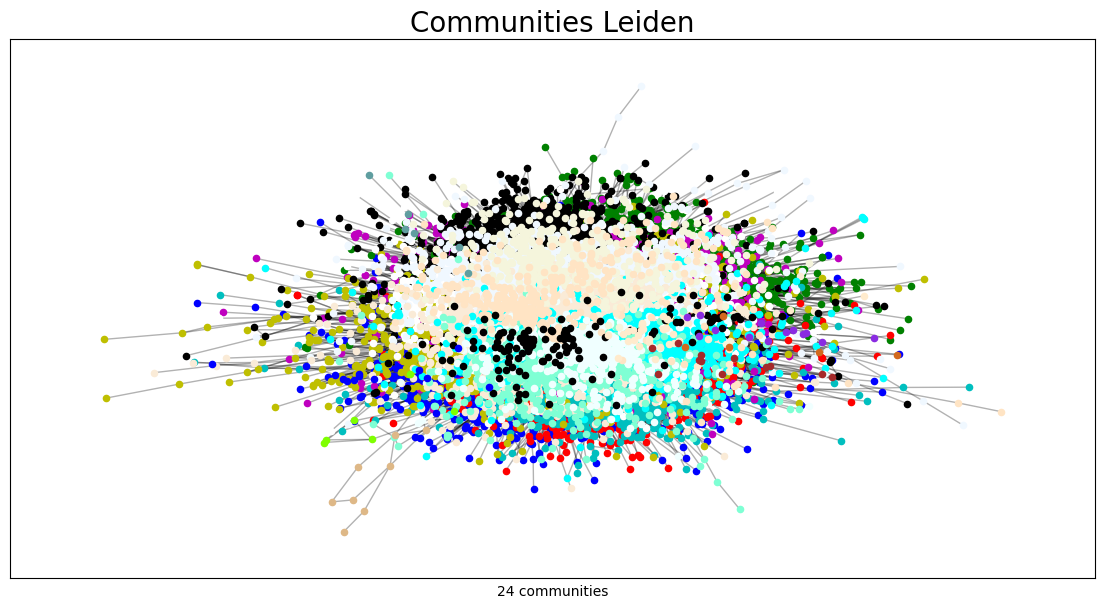

In [ ]:
find_save_communities(net, isolated = None, directed = False, id_col = 'ID', by_years = False, community_func = detect_communities_leiden,
                          largest_comp = True, core = False, folder = 'community', method_name = 'Leiden', communities = large_comm)

In [ ]:
import shutil
shutil.make_archive('papers', 'zip', '/content/community')

'/content/papers.zip'

# Themes in communities

## Themes distribution

In [ ]:
!unzip papers.zip -d papers

Archive:  papers.zip
  inflating: papers/image.png        
  inflating: papers/net_comm.txt     
  inflating: papers/communities.csv  


In [ ]:
biochemical = pd.read_excel('drive/MyDrive/все термины по областям.xlsx', sheet_name = 'биох-ген-клетка')
medicine = pd.read_excel('drive/MyDrive/все термины по областям.xlsx', sheet_name = 'лекарства')
symptom = pd.read_excel('drive/MyDrive/все термины по областям.xlsx', sheet_name = 'симптом')
diagnosis = pd.read_excel('drive/MyDrive/все термины по областям.xlsx', sheet_name = 'диагноз')
methods = pd.read_excel('drive/MyDrive/все термины по областям.xlsx', sheet_name = 'методы исследования')
cns = pd.read_excel('drive/MyDrive/все термины по областям.xlsx', sheet_name = 'цнс')

In [ ]:
analogue_dict = dict()

In [ ]:
def parse_words(df):
    words_list = list()
    for i in range(len(df)):
        words_list.append(df.loc[i, 'word'])
        try:
            analogue = df.loc[i, 'analogue'].split(';')
            for word in analogue:
                analogue_dict[word] = df.loc[i, 'word']
            words_list += analogue
        except:
            pass
    return words_list

In [ ]:
biochemical_words = parse_words(biochemical)
medicine_words = parse_words(medicine)
symptom_words = parse_words(symptom)
diagnosis_words = parse_words(diagnosis)
methods_words = parse_words(methods)
cns_words = parse_words(cns)

In [ ]:
biochemical_df = pd.DataFrame()
biochemical_df.loc[:, 'word'] = biochemical_words
biochemical_df.loc[:, 'theme'] = 'biochemical'

medicine_df = pd.DataFrame()
medicine_df.loc[:, 'word'] = medicine_words
medicine_df.loc[:, 'theme'] = 'medicine'

symptom_df = pd.DataFrame()
symptom_df.loc[:, 'word'] = symptom_words
symptom_df.loc[:, 'theme'] = 'symptom'

diagnosis_df = pd.DataFrame()
diagnosis_df.loc[:, 'word'] = diagnosis_words
diagnosis_df.loc[:, 'theme'] = 'diagnosis'

methods_df = pd.DataFrame()
methods_df.loc[:, 'word'] = methods_words
methods_df.loc[:, 'theme'] = 'methods'

cns_df = pd.DataFrame()
cns_df.loc[:, 'word'] = cns_words
cns_df.loc[:, 'theme'] = 'cns'


all_words = pd.concat([biochemical_df, medicine_df, symptom_df, diagnosis_df, methods_df, cns_df]).reset_index(drop = True)

In [ ]:
papers_info = pd.read_csv('drive/MyDrive/Parkinson/papers_info.csv', sep = ';')

In [ ]:
data_specific_words = pd.read_csv('drive/MyDrive/data_specific_words.csv', sep = ';')

data_specific_words.loc[:, 'specific_annotation_words'] = data_specific_words['specific_annotation_words'].apply(lambda x: ast.literal_eval(x))

In [ ]:
leiden_comm = pd.read_csv('papers/communities.csv', sep = ';')
leiden_comm.rename(columns = {'ID':'Id'}, inplace = True)

In [ ]:
leiden_words = leiden_comm.merge(data_specific_words, how = 'left', on = 'Id') 

In [ ]:
leiden_words.groupby('community').count()['Id']

community
1.0     6136
2.0     4638
3.0     4289
4.0     3805
5.0     3586
6.0     3209
7.0     3076
8.0     2598
9.0     2356
10.0    2320
11.0    1094
12.0     955
13.0     498
14.0     467
15.0     346
16.0     145
17.0      35
18.0      15
19.0      13
20.0      12
21.0       8
22.0       6
23.0       6
24.0       5
Name: Id, dtype: int64

In [ ]:
leiden_words.merge(papers_info, on = 'Id', how = 'left').groupby('community').mean()['weight']

community
1.0      6.758963
2.0      6.827943
3.0     10.613197
4.0     10.110118
5.0      8.155884
6.0      7.122780
7.0      6.343628
8.0      8.611239
9.0      6.463497
10.0     9.583190
11.0     6.255941
12.0     6.789529
13.0     7.889558
14.0     4.738758
15.0     5.014451
16.0     4.551724
17.0     4.885714
18.0     1.333333
19.0     1.692308
20.0     2.500000
21.0     1.375000
22.0     1.666667
23.0     1.500000
24.0     2.000000
Name: weight, dtype: float64

In [ ]:
leiden_words.groupby('community').sum()[['biochemical',	'medicine',	'symptom',	'diagnosis',	'methods',	'cns']]	

,biochemical,medicine,symptom,diagnosis,methods,cns
community,,,,,,
1.0,5508.0,2853.0,3635.0,2140.0,470.0,4483.0
2.0,554.0,375.0,3467.0,402.0,1114.0,901.0
3.0,4075.0,680.0,2551.0,1351.0,249.0,2410.0
4.0,3673.0,677.0,1835.0,2003.0,169.0,2120.0
5.0,1539.0,360.0,2672.0,1455.0,1711.0,2615.0
6.0,2087.0,1803.0,2081.0,506.0,732.0,1272.0
7.0,1774.0,551.0,2253.0,234.0,2492.0,2761.0
8.0,984.0,449.0,1926.0,689.0,795.0,1232.0
9.0,763.0,475.0,1524.0,345.0,589.0,767.0


In [ ]:
leiden_words.groupby('community').sum()[['biochemical',	'medicine',	'symptom',	'diagnosis',	'methods',	'cns']].div(leiden_words.groupby('community').count()['Id'], axis = 'index')

,biochemical,medicine,symptom,diagnosis,methods,cns
community,,,,,,
1.0,0.897653,0.464961,0.592405,0.348761,0.076597,0.730606
2.0,0.119448,0.080854,0.747520,0.086675,0.240190,0.194265
3.0,0.950105,0.158545,0.594777,0.314992,0.058055,0.561903
4.0,0.965309,0.177924,0.482260,0.526413,0.044415,0.557162
5.0,0.429169,0.100390,0.745120,0.405745,0.477133,0.729225
6.0,0.650358,0.561857,0.648489,0.157682,0.228108,0.396385
7.0,0.576723,0.179129,0.732445,0.076073,0.810143,0.897594
8.0,0.378753,0.172825,0.741339,0.265204,0.306005,0.474211
9.0,0.323854,0.201613,0.646859,0.146435,0.250000,0.325552


In [ ]:
grouped_words = leiden_words[['community', 'specific_annotation_words']].groupby('community').sum().reset_index()

In [ ]:
writer = pd.ExcelWriter('drive/MyDrive/leiden_words.xlsx', engine='openpyxl')

for i in range(1, len(grouped_words) + 1):
    print(i + 1)
    cnt_words = pd.DataFrame(sorted(Counter(grouped_words.iloc[i]['specific_annotation_words']).items(), key=lambda item: item[1], reverse = True)).rename(columns = {0:'word', 1:'count'})
    cnt_words = cnt_words.merge(all_words, how = 'left', on = 'word')
    cnt_words.to_excel(writer, sheet_name=str(i + 1), index = False)
    display(cnt_words.sort_values('count', ascending = False).head(5))

writer.save()

1


,word,count,theme
0,protein,2181,biochemical
1,brain,2044,cns
2,neuroprotective,1795,medicine
3,oxidative,1657,biochemical
4,alzheimer,1639,diagnosis


2


,word,count,theme
0,gait,1612,symptom
1,movement,840,symptom
2,cognitive,825,symptom
3,activity,561,symptom
4,postural,559,symptom


3


,word,count,theme
0,protein,1858,biochemical
1,gene,1780,biochemical
2,genetic,1470,biochemical
3,mitochondria,1177,cns
4,activity,973,symptom


4


,word,count,theme
0,synuclein,2698,biochemical
1,protein,2381,biochemical
2,brain,1118,cns
3,lewy,950,diagnosis
4,alzheimer,873,diagnosis


5


,word,count,theme
0,cognitive,1528,symptom
1,brain,1385,cns
2,dementia,997,symptom
3,mri,802,methods
4,cortical,762,cns


6


,word,count,theme
0,dopamine,1225,biochemical
1,levodopa,1033,medicine
2,dyskinesia,854,symptom
3,brain,614,cns
4,striatum,548,cns


7


,word,count,theme
0,stimulation,2227,methods
1,brain,2204,cns
2,dbs,1584,methods
3,nucleus,1331,biochemical
4,subthalamic,1330,cns


8


,word,count,theme
0,movement,628,symptom
1,cognitive,560,symptom
2,dysfunction,558,symptom
3,dementia,406,symptom
4,brain,400,cns


9


,word,count,theme
0,cognitive,684,symptom
1,dopamine,503,biochemical
2,brain,407,cns
3,movement,297,symptom
4,dementia,272,symptom


10


,word,count,theme
0,brain,640,cns
1,alzheimer,407,diagnosis
2,dysfunction,323,symptom
3,protein,320,biochemical
4,synuclein,314,biochemical


11


,word,count,theme
0,brain,411,cns
1,dopamine,406,biochemical
2,transplantation,284,methods
3,nigra,276,cns
4,striatum,261,cns


12


,word,count,theme
0,gene,420,biochemical
1,protein,363,biochemical
2,brain,270,cns
3,alzheimer,245,diagnosis
4,rna,221,biochemical


13


,word,count,theme
0,alzheimer,146,diagnosis
1,brain,140,cns
2,neuroprotective,130,medicine
4,insulin,110,medicine
3,protein,110,biochemical


14


,word,count,theme
0,postural,92,symptom
1,surgery,81,methods
2,syndrome,71,symptom
3,movement,56,symptom
4,cognitive,53,symptom


15


,word,count,theme
0,tomography,93,methods
1,cognitive,82,symptom
2,brain,78,cns
3,ganglia,75,cns
4,movement,73,symptom


16


,word,count,theme
0,cancer,61,diagnosis
1,gene,36,biochemical
2,alzheimer,34,diagnosis
3,genetic,33,biochemical
4,dementia,29,symptom


17


,word,count,theme
0,brain,18,cns
1,neuroprotective,16,medicine
2,nigra,11,cns
3,alzheimer,10,diagnosis
4,striatum,8,cns


18


,word,count,theme
0,alzheimer,15,diagnosis
2,amyotrophic,12,diagnosis
1,sclerosis,12,symptom
3,als,9,diagnosis
4,neurotoxin,6,biochemical


19


,word,count,theme
0,gene,9,biochemical
2,tremor,7,symptom
1,frontotemporal,7,cns
3,sclerosis,6,symptom
4,genetic,6,biochemical


20


,word,count,theme
0,alzheimer,6,diagnosis
1,schizophrenia,5,diagnosis
2,pcr,4,biochemical
3,molecular,4,biochemical
4,gene,3,biochemical


21


,word,count,theme
0,dopamine,8,biochemical
1,genetic,2,biochemical
2,levodopa,1,medicine
3,protein,1,biochemical
4,allele,1,biochemical


22


,word,count,theme
0,protein,4,biochemical
1,activity,2,symptom
2,lipid,2,biochemical
3,gene,1,biochemical
4,pcr,1,biochemical


23


,word,count,theme
0,mao,6,biochemical
1,activity,4,symptom
2,cancer,3,diagnosis
3,alzheimer,2,diagnosis
4,neurotransmission,1,biochemical


24


,word,count,theme
0,movement,3,symptom
1,extrapyramidal,2,cns
2,hyperkinetic,1,symptom
3,huntington,1,diagnosis
4,ataxia,1,symptom


In [ ]:
data = read_data('drive/MyDrive/Parkinson/filtered_data.csv', sep = ';')
net = pd.read_csv('drive/MyDrive/Parkinson/excluded_net.csv', sep = ';')
net_no_periods = net.groupby(['ID1', 'ID2']).sum()['weight'].reset_index()
net_no_periods.to_csv('net_comm.txt', sep = '\t', index = False, header = False)
G = nx.read_weighted_edgelist('net_comm.txt', delimiter='\t', nodetype = str, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))   

In [ ]:
nx.density(G)

0.00019612197903872488

In [ ]:
comm_info = leiden_words.merge(papers_info, on = 'Id', how = 'left')

In [ ]:
len(data_specific_words)

37542

In [ ]:
39811 - 37542

2269

In [ ]:
for i in range(1, 25):
    print('Community:', i)
    print('Rank <= 10:', len(comm_info[(comm_info['community'] == i) & (comm_info['In-degree rank'] <= 10)]))
    print('10 < Rank <= 100:', len(comm_info[(comm_info['community'] == i) & (comm_info['In-degree rank'] <= 100) & (comm_info['In-degree rank'] > 10)]))
    print('100 < Rank <= 200:', len(comm_info[(comm_info['community'] == i) & (comm_info['In-degree rank'] <= 200) & (comm_info['In-degree rank'] > 100)]))
    print('Rank > 200:', len(comm_info[(comm_info['community'] == i) & (comm_info['In-degree rank'] > 200)]))
    print('Density:', nx.density(G.subgraph(set(comm_info[comm_info['community'] == i]['Id'].astype(str).values))))
    display(comm_info[comm_info['community'] == i].sort_values('weight', ascending = False).head(10)[['DN_y', 'weight', 'In-degree rank', 'BI 1% rank', 'PI 1% rank', 'biochemical',	'medicine',	'symptom',	'diagnosis',	'methods',	'cns']])

Community: 1
Rank <= 10: 0
10 < Rank <= 100: 20
100 < Rank <= 200: 1218
Rank > 200: 4898
Density: 0.0007467254058775339


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
768,The clinical symptoms of Parkinson's disease.,279,17,2,2,0.0,0.0,1.0,0.0,0.0,0.0
100,Oxidative stress and Parkinson’s disease,270,18,3,3,1.0,0.0,1.0,0.0,0.0,1.0
288,Neuroinflammation in Parkinson’s disease and i...,267,19,4,4,1.0,0.0,0.0,0.0,0.0,1.0
1751,T cells from patients with Parkinson’s disease...,244,23,8,8,1.0,0.0,0.0,0.0,0.0,0.0
738,Understanding Dopaminergic Cell Death Pathways...,202,37,22,22,1.0,0.0,1.0,0.0,0.0,1.0
1022,How neuroinflammation contributes to neurodege...,175,50,35,35,0.0,0.0,1.0,1.0,0.0,1.0
1668,The Role of Astrocyte Dysfunction in Parkinson...,146,70,55,55,0.0,0.0,0.0,0.0,0.0,1.0
2645,Block of A1 astrocyte conversion by microglia ...,139,76,61,61,1.0,1.0,0.0,1.0,0.0,1.0
1354,The SH-SY5Y cell line in Parkinson's disease r...,137,78,63,63,1.0,0.0,1.0,0.0,0.0,0.0
1088,Aberrations in Peripheral Inflammatory Cytokin...,129,84,69,69,1.0,0.0,1.0,0.0,0.0,0.0


Community: 2
Rank <= 10: 0
10 < Rank <= 100: 5
100 < Rank <= 200: 1022
Rank > 200: 3611
Density: 0.0012431644785279325


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
6603,Technology in Parkinson's disease: Challenges ...,160,57,42,42,0.0,0.0,1.0,0.0,0.0,0.0
6209,Levodopa Is a Double‐Edged Sword for Balance a...,142,74,59,59,1.0,1.0,1.0,0.0,0.0,0.0
6190,Rehabilitation for Parkinson's disease: Curren...,113,98,83,83,1.0,0.0,1.0,0.0,0.0,0.0
6455,Rivastigmine for gait stability in patients wi...,110,100,85,85,0.0,1.0,1.0,1.0,0.0,0.0
6214,Detecting and monitoring the symptoms of Parki...,110,100,85,85,0.0,0.0,1.0,0.0,1.0,0.0
6140,Motor automaticity in Parkinson's disease.,108,102,87,87,1.0,0.0,1.0,0.0,1.0,1.0
7460,Long-term effects of exercise and physical the...,102,108,93,93,0.0,0.0,1.0,0.0,0.0,0.0
6262,Exercise for falls prevention in Parkinson dis...,100,110,95,95,0.0,0.0,1.0,0.0,0.0,0.0
6298,Progression of gait dysfunction in incident Pa...,96,114,99,99,1.0,1.0,1.0,0.0,0.0,0.0
6223,Nonpharmacological treatments for patients wit...,96,114,99,99,0.0,0.0,1.0,0.0,1.0,0.0


Community: 3
Rank <= 10: 2
10 < Rank <= 100: 38
100 < Rank <= 200: 1178
Rank > 200: 3071
Density: 0.001830165591951643


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
10775,"The Roles of PINK1, Parkin and Mitochondrial F...",458,7,195,195,1.0,0.0,1.0,0.0,0.0,1.0
11891,A meta-analysis of genome-wide association stu...,413,10,195,195,1.0,0.0,0.0,0.0,0.0,0.0
11101,Phosphoproteomics reveals that Parkinson's dis...,396,11,195,195,1.0,0.0,1.0,0.0,0.0,1.0
13142,"Identification of novel risk loci, causal insi...",373,12,195,195,1.0,0.0,1.0,0.0,0.0,1.0
11658,Dopamine oxidation mediates mitochondrial and ...,235,27,12,12,1.0,0.0,1.0,0.0,0.0,1.0
11088,"Past, present, and future of Parkinson's disea...",231,28,13,13,0.0,0.0,1.0,1.0,0.0,0.0
11456,Mitochondrial dysfunction in Parkinson's disease.,212,34,19,19,1.0,0.0,1.0,1.0,0.0,1.0
11257,Genetics in Parkinson disease: Mendelian versu...,206,36,21,21,1.0,1.0,1.0,0.0,0.0,0.0
10847,Mitochondrial dysfunction and mitophagy in Par...,199,39,24,24,1.0,0.0,1.0,0.0,0.0,1.0
10936,Glucocerebrosidase activity in Parkinson’s dis...,179,47,32,32,1.0,0.0,1.0,1.0,0.0,0.0


Community: 4
Rank <= 10: 1
10 < Rank <= 100: 31
100 < Rank <= 200: 973
Rank > 200: 2800
Density: 0.0017741888682084423


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
15092,α-Synuclein strains cause distinct synucleinop...,439,8,195,195,1.0,0.0,1.0,1.0,0.0,1.0
15825,Selective neuronal vulnerability in Parkinson ...,309,14,195,195,1.0,0.0,1.0,1.0,0.0,1.0
15687,Pathological α-synuclein transmission initiate...,236,26,11,11,1.0,1.0,1.0,1.0,0.0,1.0
15872,α-synuclein toxicity in neurodegeneration: mec...,224,29,14,14,1.0,0.0,1.0,1.0,0.0,0.0
15483,Solid-state NMR structure of a pathogenic fibr...,223,30,15,15,1.0,0.0,0.0,1.0,0.0,0.0
15187,Evidence for α-synuclein prions causing multip...,207,35,20,20,1.0,0.0,1.0,1.0,0.0,1.0
15191,Targeting α-synuclein for treatment of Parkins...,195,41,26,26,1.0,0.0,0.0,1.0,0.0,1.0
15378,Structural disorder of monomeric α-synuclein p...,184,46,31,31,1.0,0.0,0.0,0.0,0.0,0.0
15565,α-Synuclein binds to TOM20 and inhibits mitoch...,184,46,31,31,1.0,1.0,1.0,0.0,0.0,1.0
15091,Lipid vesicles trigger α-synuclein aggregation...,176,49,34,34,1.0,0.0,0.0,0.0,0.0,0.0


Community: 5
Rank <= 10: 0
10 < Rank <= 100: 7
100 < Rank <= 200: 915
Rank > 200: 2664
Density: 0.001585819952223936


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
19750,Cognitive decline in Parkinson disease,314,13,195,195,1.0,0.0,1.0,1.0,0.0,1.0
18896,Parkinson's disease dementia: a neural network...,167,52,37,37,0.0,0.0,1.0,0.0,0.0,1.0
18996,"Interactions of iron, dopamine and neuromelani...",156,61,46,46,1.0,0.0,0.0,0.0,0.0,1.0
18994,Cognitive performance and neuropsychiatric sym...,154,63,48,48,0.0,0.0,1.0,0.0,0.0,0.0
19582,Clinical variables and biomarkers in predictio...,145,71,56,56,1.0,0.0,1.0,0.0,0.0,0.0
18893,Cognitive impairment and resting-state network...,143,73,58,58,0.0,0.0,1.0,1.0,1.0,1.0
19044,Baseline and longitudinal grey matter changes ...,120,91,76,76,1.0,0.0,1.0,0.0,0.0,1.0
19134,Longitudinal study of normal cognition in Park...,102,108,93,93,1.0,0.0,1.0,1.0,0.0,0.0
18951,Resting-state functional connectivity associat...,99,111,96,96,0.0,0.0,1.0,1.0,1.0,1.0
19068,Cognitive training in Parkinson disease A syst...,98,112,97,97,0.0,0.0,1.0,0.0,0.0,0.0


Community: 6
Rank <= 10: 1
10 < Rank <= 100: 9
100 < Rank <= 200: 676
Rank > 200: 2523
Density: 0.001464572442374898


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
24112,"Global, regional, and national burden of Parki...",459,6,195,195,NaN,NaN,NaN,NaN,NaN,NaN
23569,"Global, regional, and national burden of neuro...",221,31,16,16,0.0,0.0,1.0,1.0,0.0,1.0
24667,Diagnosis and Treatment of Parkinson Disease: ...,220,32,17,17,1.0,1.0,1.0,0.0,1.0,1.0
23696,International Parkinson and movement disorder ...,216,33,18,18,1.0,1.0,1.0,0.0,1.0,1.0
22665,Pathophysiology of L-dopa-induced motor and no...,201,38,23,23,1.0,1.0,1.0,0.0,0.0,0.0
22510,Update on treatments for nonmotor symptoms of ...,197,40,25,25,0.0,0.0,1.0,0.0,0.0,0.0
23038,The Incidence of Parkinson's Disease: A System...,184,46,31,31,NaN,NaN,NaN,NaN,NaN,NaN
24135,The Emerging Evidence of the Parkinson Pandemic.,140,75,60,60,NaN,NaN,NaN,NaN,NaN,NaN
22466,EuroInf: A Multicenter Comparative Observation...,129,84,69,69,0.0,1.0,1.0,0.0,1.0,0.0
22508,Levodopa-carbidopa intestinal gel in advanced ...,116,95,80,80,1.0,1.0,1.0,0.0,1.0,0.0


Community: 7
Rank <= 10: 0
10 < Rank <= 100: 2
100 < Rank <= 200: 579
Rank > 200: 2495
Density: 0.0016348969731569878


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
25688,Therapeutic deep brain stimulation reduces cor...,191,43,28,28,0.0,0.0,1.0,0.0,1.0,1.0
26406,The modulatory effect of adaptive deep brain s...,117,94,79,79,1.0,0.0,1.0,0.0,1.0,1.0
25728,Bilateral adaptive deep brain stimulation is e...,108,102,87,87,1.0,1.0,1.0,0.0,1.0,1.0
26499,Connectivity Predicts deep brain stimulation o...,108,102,87,87,1.0,0.0,0.0,0.0,1.0,1.0
25698,Axial disability and deep brain stimulation in...,101,109,94,94,1.0,0.0,1.0,0.0,1.0,1.0
26639,Beta burst dynamics in Parkinson's disease OFF...,94,116,101,101,1.0,1.0,1.0,0.0,1.0,1.0
25717,Adaptive deep brain stimulation in a freely mo...,87,123,108,108,0.0,0.0,1.0,0.0,1.0,1.0
25839,GPi vs STN deep brain stimulation for Parkinso...,83,127,112,112,1.0,1.0,1.0,0.0,1.0,1.0
25990,Deep brain stimulation modulates synchrony wit...,82,128,113,113,1.0,0.0,1.0,0.0,1.0,1.0
25749,Beta oscillations in freely moving Parkinson's...,78,132,117,117,0.0,0.0,1.0,0.0,1.0,1.0


Community: 8
Rank <= 10: 3
10 < Rank <= 100: 15
100 < Rank <= 200: 533
Rank > 200: 2047
Density: 0.0018925431517327835


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
28768,MDS clinical diagnostic criteria for Parkinson...,1563,1,195,195,0.0,0.0,1.0,0.0,0.0,0.0
28830,MDS research criteria for prodromal Parkinson'...,473,4,195,195,1.0,1.0,1.0,0.0,0.0,0.0
28769,Non-motor features of Parkinson disease.,459,6,195,195,1.0,0.0,0.0,0.0,0.0,0.0
28754,The Onset of Nonmotor Symptoms in Parkinson's ...,253,21,6,6,0.0,0.0,1.0,0.0,1.0,0.0
28777,Prediagnostic presentations of Parkinson's dis...,242,24,9,9,0.0,0.0,1.0,0.0,0.0,0.0
28782,New Clinical Subtypes of Parkinson Disease and...,239,25,10,10,0.0,0.0,1.0,0.0,0.0,1.0
28935,Accuracy of clinical diagnosis of Parkinson di...,212,34,19,19,0.0,0.0,1.0,0.0,0.0,1.0
28807,Parkinson risk in idiopathic REM sleep behavio...,177,48,33,33,1.0,1.0,1.0,1.0,0.0,1.0
29345,Clinical criteria for subtyping Parkinson’s di...,165,53,38,38,1.0,0.0,1.0,1.0,1.0,1.0
28786,Non motor subtypes and Parkinson's disease,160,57,42,42,0.0,0.0,1.0,0.0,1.0,0.0


Community: 9
Rank <= 10: 0
10 < Rank <= 100: 7
100 < Rank <= 200: 473
Rank > 200: 1876
Density: 0.0017952988079403358


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
32466,Prevalence of Parkinson's disease across North...,177,48,33,33,NaN,NaN,NaN,NaN,NaN,NaN
31387,Apathy in Parkinson's disease: clinical featur...,156,61,46,46,0.0,0.0,1.0,0.0,0.0,1.0
31361,Clinical spectrum of impulse control disorders...,150,66,51,51,1.0,1.0,1.0,0.0,0.0,0.0
31375,Apathy in Parkinson's disease: A systematic re...,119,92,77,77,0.0,0.0,1.0,0.0,1.0,0.0
31937,The psychosis spectrum in Parkinson disease,116,95,80,80,0.0,0.0,1.0,0.0,1.0,1.0
31643,Prevalence of anxiety in Parkinson's disease: ...,115,96,81,81,0.0,0.0,1.0,0.0,0.0,0.0
31439,Serotonin in Parkinson's disease,111,99,84,84,1.0,0.0,1.0,0.0,1.0,0.0
31958,Impulse control disorders and levodopa-induced...,108,102,87,87,1.0,1.0,1.0,0.0,0.0,1.0
31757,The prominent role of serotonergic degeneratio...,88,122,107,107,1.0,1.0,1.0,0.0,1.0,1.0
31571,Minor hallucinations occur in drug-naive Parki...,86,124,109,109,0.0,1.0,1.0,0.0,0.0,0.0


Community: 10
Rank <= 10: 4
10 < Rank <= 100: 14
100 < Rank <= 200: 537
Rank > 200: 1765
Density: 0.002782486505776866


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
33730,Gut Microbiota Regulate Motor Deficits and Neu...,500,2,195,195,1.0,0.0,1.0,0.0,0.0,1.0
34135,Epidemiology of Parkinson's disease.,485,3,195,195,1.0,0.0,1.0,1.0,0.0,1.0
34076,The epidemiology of Parkinson's disease: risk ...,469,5,195,195,1.0,1.0,1.0,0.0,0.0,1.0
33713,Gut microbiota are related to Parkinson's dise...,416,9,195,195,1.0,0.0,1.0,0.0,0.0,0.0
33790,Colonic bacterial composition in Parkinson's d...,308,15,195,195,1.0,0.0,1.0,0.0,0.0,0.0
33715,Vagotomy and subsequent risk of Parkinson's di...,280,16,1,1,1.0,0.0,0.0,0.0,0.0,1.0
34036,Short chain fatty acids and gut microbiota dif...,256,20,5,5,1.0,0.0,0.0,0.0,0.0,0.0
34895,Transneuronal Propagation of Pathologic α-Synu...,252,22,7,7,1.0,0.0,0.0,1.0,0.0,1.0
34145,Parkinson's disease and Parkinson's disease me...,192,42,27,27,1.0,1.0,1.0,0.0,0.0,0.0
33862,Pathogenesis of Parkinson disease—the gut–brai...,185,45,30,30,1.0,0.0,1.0,0.0,0.0,1.0


Community: 11
Rank <= 10: 0
10 < Rank <= 100: 2
100 < Rank <= 200: 205
Rank > 200: 887
Density: 0.0037633536331415974


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
36418,Human iPS cell-derived dopaminergic neurons fu...,138,77,62,62,1.0,0.0,1.0,0.0,1.0,1.0
36031,Gene delivery of neurturin to putamen and subs...,113,98,83,83,0.0,0.0,0.0,0.0,1.0,1.0
36052,Cell‑based therapies for Parkinson disease —pa...,107,103,88,88,1.0,0.0,0.0,0.0,1.0,1.0
36192,Extensive graft-derived dopaminergic innervati...,102,108,93,93,1.0,0.0,0.0,1.0,1.0,1.0
36436,Human Trials of Stem Cell-Derived Dopamine Neu...,99,111,96,96,1.0,0.0,0.0,0.0,0.0,0.0
36036,Successful function of autologous iPSC-derived...,92,118,103,103,1.0,0.0,1.0,0.0,1.0,1.0
36047,How to make a midbrain dopaminergic neuron,85,125,110,110,1.0,0.0,0.0,0.0,0.0,1.0
36598,Randomized trial of intermittent intraputamena...,79,131,116,116,1.0,0.0,0.0,0.0,1.0,1.0
36257,Predictive Markers Guide Differentiation to Im...,78,132,117,117,1.0,0.0,0.0,0.0,1.0,1.0
36035,Optogenetics enables functional analysis of hu...,75,135,120,120,1.0,1.0,1.0,0.0,1.0,1.0


Community: 12
Rank <= 10: 0
10 < Rank <= 100: 1
100 < Rank <= 200: 206
Rank > 200: 748
Density: 0.004723017989836127


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
37129,Biomarkers of Parkinson's disease: present and...,122,89,74,74,1.0,0.0,1.0,1.0,0.0,1.0
37199,Altered microRNA profiles in cerebrospinal flu...,95,115,100,100,1.0,1.0,0.0,0.0,0.0,1.0
37186,microRNA-155 Regulates Alpha-Synuclein-Induced...,83,127,112,112,1.0,0.0,0.0,0.0,0.0,1.0
37178,MiR-124 Regulates Apoptosis and Autophagy Proc...,67,143,128,128,1.0,1.0,1.0,0.0,0.0,1.0
37437,microRNAs in Parkinson's Disease: From Pathoge...,66,144,129,129,1.0,0.0,1.0,1.0,0.0,1.0
37274,Identification of a panel of five serum miRNAs...,61,149,134,134,1.0,0.0,0.0,1.0,0.0,0.0
37110,Inhibition of miR-34b and miR-34c enhances α-s...,54,156,141,141,1.0,0.0,0.0,0.0,0.0,1.0
37195,microRNA Profiles in Parkinson's Disease Prefr...,53,157,142,142,1.0,0.0,1.0,1.0,0.0,1.0
37116,Parkinson's disease correlates with promoter m...,47,163,148,148,1.0,0.0,1.0,0.0,0.0,1.0
37323,MicroRNA biomarkers of Parkinson’s disease in ...,46,164,149,149,1.0,0.0,0.0,1.0,0.0,0.0


Community: 13
Rank <= 10: 0
10 < Rank <= 100: 1
100 < Rank <= 200: 121
Rank > 200: 376
Density: 0.009337147382285683


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
38182,Exenatide once weekly versus placebo in Parkin...,186,44,29,29,1.0,1.0,1.0,0.0,1.0,1.0
38062,Pioglitazone in early Parkinson's disease: a p...,106,104,89,89,0.0,1.0,0.0,0.0,1.0,0.0
38146,Insulin resistance and Parkinson’s disease: A ...,89,121,106,106,1.0,1.0,1.0,0.0,0.0,1.0
38064,Neuroprotective effects of lixisenatide and li...,71,139,124,124,1.0,1.0,0.0,1.0,0.0,1.0
38265,Association between diabetes and subsequent Pa...,70,140,125,125,1.0,0.0,0.0,0.0,0.0,0.0
38092,The glucagon-like peptide 1 (GLP) receptor as ...,69,141,126,126,1.0,1.0,1.0,1.0,0.0,0.0
38248,Diabetes mellitus and Parkinson disease.,64,146,131,131,1.0,0.0,1.0,0.0,0.0,0.0
38068,"Statins, plasma cholesterol, and risk of Parki...",60,150,135,135,1.0,0.0,1.0,0.0,0.0,0.0
38118,Metformin Prevents Dopaminergic Neuron Death i...,59,151,136,136,1.0,1.0,0.0,0.0,0.0,1.0
38070,Glitazone Treatment and Incidence of Parkinson...,59,151,136,136,0.0,1.0,0.0,0.0,0.0,0.0


Community: 14
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 70
Rank > 200: 397
Density: 0.007104061170286093


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
38577,Measuring the burden and mortality of hospital...,55,155,140,140,0.0,0.0,1.0,0.0,0.0,0.0
38568,Camptocormia in Parkinson's disease: definitio...,46,164,149,149,0.0,0.0,1.0,0.0,0.0,0.0
38561,Hospitalisation and comorbidities in Parkinson...,39,171,156,156,NaN,NaN,NaN,NaN,NaN,NaN
38631,Pisa syndrome in Parkinson disease: An observa...,36,174,159,159,1.0,1.0,1.0,0.0,0.0,0.0
38626,Event-related potentials and cognition in Park...,34,176,161,161,1.0,0.0,1.0,1.0,0.0,1.0
38567,Parkinson's disease: chameleons and mimics.,32,178,163,163,0.0,0.0,1.0,0.0,0.0,0.0
38629,Pisa syndrome in Parkinson's disease and parki...,30,180,165,165,0.0,1.0,1.0,0.0,0.0,0.0
38563,Effect of neurostimulation on camptocormia in ...,29,181,166,166,1.0,1.0,1.0,0.0,1.0,1.0
38651,Pisa syndrome in Parkinson's disease: An integ...,26,184,169,169,1.0,1.0,1.0,0.0,0.0,0.0
38619,The P3a wave: A reliable neurophysiological me...,25,185,170,170,0.0,1.0,1.0,0.0,1.0,0.0


Community: 15
Rank <= 10: 0
10 < Rank <= 100: 1
100 < Rank <= 200: 56
Rank > 200: 289
Density: 0.010220323364329396


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39074,Visual dysfunction in Parkinson's disease.,132,81,66,66,1.0,0.0,1.0,0.0,0.0,1.0
39170,Phosphorylated α-synuclein in the retina is a ...,50,160,145,145,0.0,0.0,0.0,0.0,0.0,1.0
39053,Oculo-Visual Dysfunction in Parkinson's Disease.,36,174,159,159,0.0,0.0,1.0,1.0,0.0,1.0
39107,Ocular and visual disorders in Parkinson's dis...,30,180,165,165,NaN,NaN,NaN,NaN,NaN,NaN
39031,Antisaccades and executive dysfunction in earl...,28,182,167,167,0.0,0.0,1.0,0.0,0.0,0.0
39205,Retinal α-synuclein deposits in Parkinson’s di...,27,183,168,168,1.0,0.0,0.0,1.0,0.0,1.0
39065,Visual dysfunction and its correlation with re...,27,183,168,168,0.0,0.0,1.0,0.0,1.0,1.0
39192,Oculo-visual abnormalities in Parkinson's dise...,26,184,169,169,1.0,0.0,1.0,0.0,0.0,1.0
39033,Correlation Between Structural and Functional ...,25,185,170,170,NaN,NaN,NaN,NaN,NaN,NaN
39185,Retinal thinning associates with nigral dopami...,25,185,170,170,1.0,0.0,0.0,0.0,1.0,1.0


Community: 16
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 19
Rank > 200: 126
Density: 0.02136015325670498


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39381,The associations between Parkinson's disease a...,34,176,161,161,1.0,0.0,1.0,1.0,0.0,1.0
39378,Association Between Parkinson Disease and Risk...,28,182,167,167,1.0,0.0,0.0,1.0,0.0,1.0
39383,The MC1R melanoma risk variant p.R160W is asso...,26,184,169,169,1.0,0.0,0.0,0.0,0.0,0.0
39436,Biological and Clinical Implications of Comorb...,22,188,173,173,0.0,1.0,0.0,1.0,0.0,0.0
39387,Cancer in Parkinson's disease.,21,189,174,174,0.0,0.0,0.0,1.0,0.0,0.0
39395,PARKIN Inactivation Links Parkinson's Disease ...,17,193,178,178,1.0,0.0,1.0,0.0,0.0,0.0
39442,Parkinson's Disease and Melanoma: Co-Occurrenc...,17,193,178,178,1.0,0.0,0.0,1.0,0.0,1.0
39386,The association between Parkinson’s disease an...,15,195,180,180,1.0,1.0,0.0,0.0,0.0,0.0
39391,Associations between cancer and Parkinson’s di...,14,196,181,181,1.0,0.0,0.0,1.0,0.0,0.0
39397,Cancer incidence among Parkinson's disease pat...,14,196,181,181,0.0,0.0,0.0,1.0,0.0,0.0


Community: 17
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 6
Rank > 200: 29
Density: 0.10672268907563025


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39519,Near-infrared light is neuroprotective in a mo...,22,188,173,173,0.0,1.0,1.0,0.0,0.0,1.0
39520,810nm near-infrared light offers neuroprotecti...,21,189,174,174,0.0,1.0,1.0,0.0,0.0,0.0
39523,Turning On Lights to Stop Neurodegeneration: T...,14,196,181,181,1.0,1.0,1.0,1.0,0.0,1.0
39528,Effects of a higher dose of near-infrared ligh...,11,199,184,184,0.0,1.0,0.0,0.0,0.0,1.0
39521,Intracranial application of near-infrared ligh...,11,199,184,184,0.0,1.0,1.0,0.0,0.0,1.0
39518,Photobiomodulation Suppresses Alpha-Synuclein-...,10,200,185,185,1.0,0.0,0.0,0.0,0.0,1.0
39527,Near-infrared light treatment reduces astrogli...,9,201,186,186,1.0,1.0,0.0,0.0,0.0,1.0
39532,Photobiomodulation-induced changes in a monkey...,8,202,187,187,1.0,0.0,1.0,0.0,0.0,1.0
39524,Targeting the body to protect the brain: induc...,7,203,188,188,0.0,0.0,0.0,1.0,0.0,0.0
39533,No evidence for toxicity after long-term photo...,7,203,188,188,1.0,0.0,0.0,0.0,0.0,1.0


Community: 18
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 15
Density: 0.08571428571428572


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39559,Acute β-N-Methylamino-L-alanine Toxicity in a ...,3,207,192,192,1.0,0.0,1.0,1.0,0.0,1.0
39553,A Collaborative Evaluation of LC-MS/MS Based M...,2,208,193,193,0.0,0.0,1.0,1.0,0.0,1.0
39555,The Potential Role of BMAA in Neurodegeneration,2,208,193,193,1.0,0.0,1.0,1.0,0.0,0.0
39557,Neurotoxic amino acids and their isomers in de...,2,208,193,193,1.0,1.0,1.0,1.0,0.0,0.0
39564,Assessing the Combined Toxicity of BMAA and It...,2,208,193,193,1.0,0.0,1.0,1.0,0.0,0.0
39554,Trans generational effects of the neurotoxin B...,1,209,194,194,1.0,0.0,1.0,1.0,0.0,0.0
39556,Optimization of the Determination Method for D...,1,209,194,194,1.0,0.0,1.0,1.0,0.0,0.0
39558,β-N-Methylamino-L-alanine (BMAA) Toxicity Is G...,1,209,194,194,1.0,0.0,1.0,1.0,0.0,1.0
39560,A Single Neonatal Exposure to BMAA in a Rat Mo...,1,209,194,194,1.0,0.0,1.0,1.0,0.0,1.0
39561,Editorial: Unraveling Neuroprotective and Neur...,1,209,194,194,0.0,0.0,0.0,1.0,0.0,0.0


Community: 19
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 13
Density: 0.11538461538461539


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39568,C9orf72 intermediate repeats are associated wi...,6,204,189,189,1.0,0.0,1.0,1.0,0.0,1.0
39572,Association of NOTCH2NLC Repeat Expansions Wit...,5,205,190,190,1.0,1.0,1.0,0.0,0.0,0.0
39571,NOTCH2NLC Intermediate-Length Repeat Expansion...,4,206,191,191,1.0,0.0,1.0,0.0,0.0,0.0
39569,C9ORF72 intermediate repeat expansion in patie...,2,208,193,193,1.0,1.0,1.0,1.0,0.0,1.0
39570,Parkinsonism in frontotemporal dementias.,2,208,193,193,1.0,1.0,1.0,1.0,0.0,1.0
39578,No genetic evidence for the involvement of GGC...,2,208,193,193,1.0,0.0,0.0,1.0,0.0,0.0
39576,Generation of an induced pluripotent stem cell...,1,209,194,194,1.0,0.0,0.0,0.0,0.0,0.0
39573,A Clinicopathologic Study of Movement Disorder...,0,210,195,195,0.0,1.0,1.0,1.0,0.0,1.0
39574,Carriership of two copies of C9orf72 hexanucle...,0,210,195,195,1.0,0.0,1.0,1.0,0.0,1.0
39575,Neuronal intranuclear inclusion disease: recog...,0,210,195,195,1.0,0.0,1.0,1.0,0.0,1.0


Community: 20
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 12
Density: 0.1893939393939394


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39584,The correlation between Toxoplasma gondii infe...,8,202,187,187,1.0,0.0,0.0,0.0,0.0,0.0
39582,Neurobiological studies on the relationship be...,5,205,190,190,0.0,0.0,0.0,1.0,0.0,0.0
39581,Seroprevalence of Toxoplasma gondii in Iranian...,4,206,191,191,0.0,1.0,1.0,1.0,0.0,0.0
39585,Parkinson's disease and Toxoplasma gondii infe...,4,206,191,191,1.0,0.0,0.0,0.0,0.0,0.0
39583,Toxoplasma gondii exposure and Parkinson's dis...,3,207,192,192,1.0,1.0,0.0,0.0,0.0,0.0
39587,The Association between Toxoplasma gondii Infe...,3,207,192,192,NaN,NaN,NaN,NaN,NaN,NaN
39586,Alzheimer's disease and Toxoplasma gondii infe...,2,208,193,193,1.0,0.0,0.0,1.0,0.0,0.0
39592,Psychiatric aspects of toxoplasmosis: an India...,1,209,194,194,1.0,0.0,0.0,1.0,0.0,0.0
39588,Toxoplasma gondii infection and risk of Parkin...,0,210,195,195,1.0,0.0,0.0,1.0,0.0,0.0
39589,A Case-Control Study of Seroprevalence of Toxo...,0,210,195,195,1.0,1.0,1.0,1.0,0.0,0.0


Community: 21
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 8
Density: 0.16071428571428573


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39597,Accumulation of l-DOPA in various organs of fa...,4,206,191,191,1.0,0.0,0.0,0.0,0.0,0.0
39594,LC-MS determination of L-DOPA concentration in...,2,208,193,193,1.0,0.0,0.0,0.0,0.0,0.0
39599,Yield and Quality of Faba Bean (Vicia faba L. ...,2,208,193,193,1.0,0.0,0.0,0.0,0.0,0.0
39593,Rapid analysis of medically relevant compounds...,1,209,194,194,1.0,1.0,0.0,0.0,0.0,0.0
39595,"Fatty Acid Composition, Isoflavone and L-3,4-d...",1,209,194,194,1.0,1.0,0.0,0.0,0.0,0.0
39596,"Development of a Sustainable, Simple, and Robu...",1,209,194,194,1.0,0.0,0.0,0.0,0.0,0.0
39598,From by-Product to Unconventional Vegetable: P...,0,210,195,195,1.0,0.0,0.0,0.0,0.0,0.0
39600,"Effect of Thermal Processing on Color, Phenoli...",0,210,195,195,1.0,0.0,1.0,0.0,0.0,0.0


Community: 22
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 6
Density: 0.3333333333333333


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39601,Increased healthspan and resistance to Parkins...,4,206,191,191,1.0,0.0,0.0,0.0,0.0,1.0
39602,Nutrient compositions of Bombyx mori mature si...,3,207,192,192,1.0,0.0,0.0,0.0,0.0,0.0
39603,Comparison of nutrient compositions and pharma...,1,209,194,194,1.0,0.0,1.0,0.0,0.0,0.0
39604,Nutrition composition differences among steame...,1,209,194,194,1.0,0.0,0.0,0.0,0.0,0.0
39605,Phytochemicals and silk proteins in mature sil...,1,209,194,194,1.0,0.0,1.0,0.0,0.0,0.0
39606,Synergistic Neuroprotective Effects of Mature ...,0,210,195,195,1.0,1.0,1.0,0.0,0.0,1.0


Community: 23
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 6
Density: 0.26666666666666666


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39608,"Inhibition of monoamine oxidase by indole-5,6-...",4,206,191,191,1.0,0.0,1.0,0.0,0.0,0.0
39607,An evaluation of synthetic indole derivatives ...,2,208,193,193,1.0,0.0,1.0,1.0,0.0,0.0
39609,An investigation of the monoamine oxidase inhi...,2,208,193,193,1.0,0.0,1.0,1.0,0.0,0.0
39610,Novel strategy of constructing fluorescent pro...,1,209,194,194,1.0,0.0,0.0,0.0,0.0,0.0
39611,"Optimization of pyrrolo[3,4-f]indole-5,7-dione...",0,210,195,195,1.0,0.0,1.0,0.0,0.0,0.0
39612,"Investigation of pyrazolo[1,5-a]quinoxalin-4-o...",0,210,195,195,1.0,0.0,0.0,1.0,0.0,0.0


Community: 24
Rank <= 10: 0
10 < Rank <= 100: 0
100 < Rank <= 200: 0
Rank > 200: 5
Density: 0.25


,DN_y,weight,In-degree rank,BI 1% rank,PI 1% rank,biochemical,medicine,symptom,diagnosis,methods,cns
39614,The pattern of neurological diseases in elderl...,6,204,189,189,0.0,0.0,1.0,1.0,0.0,1.0
39615,Pattern of neurological diseases in adult outp...,2,208,193,193,NaN,NaN,NaN,NaN,NaN,NaN
39613,The Burden of Movement Disorders in Cameroon: ...,1,209,194,194,0.0,0.0,1.0,1.0,0.0,0.0
39617,Pattern of neurological diseases at the Jimma ...,1,209,194,194,0.0,0.0,1.0,0.0,0.0,1.0
39616,Spectrum of neurological diseases across gange...,0,210,195,195,0.0,0.0,1.0,1.0,0.0,0.0


## Citations

In [ ]:
grouped_cit_words = comm_info[['community', 'specific_annotation_words', 'weight']].explode('specific_annotation_words').rename(columns = {'specific_annotation_words':'word'})

In [ ]:
grouped_cit_words = grouped_cit_words.merge(all_words, how = 'left', on = 'word')

In [ ]:
grouped_cit_words

,community,word,weight,theme
0,1.0,molecular,6,biochemical
1,1.0,oxidative,6,biochemical
2,1.0,lipid,6,biochemical
3,1.0,synuclein,6,biochemical
4,1.0,synuclein,17,biochemical
...,...,...,...,...
212370,24.0,encephalopathy,0,symptom
212371,24.0,amyotrophic,0,diagnosis
212372,24.0,movement,1,symptom
212373,24.0,extrapyramidal,1,cns


In [ ]:
writer = pd.ExcelWriter('drive/MyDrive/leiden_cit_words.xlsx', engine='openpyxl')

for i in range(1, 25):
    print(i)
    cnt_cit = grouped_cit_words[grouped_cit_words['community'] == i].groupby(['word', 'theme']).sum()['weight'].reset_index().sort_values('weight', ascending = False)
    cnt_cit.to_excel(writer, sheet_name=str(i), index = False)
    display(cnt_cit.head(5))

writer.save()

1


,word,theme,weight
249,protein,biochemical,15434
36,brain,cns,14816
216,nigra,cns,13126
211,neuroprotective,medicine,11695
229,oxidative,biochemical,11070


2


,word,theme,weight
86,gait,symptom,13478
147,movement,symptom,7050
49,cognitive,symptom,6470
178,postural,symptom,4740
1,activity,symptom,4246


3


,word,theme,weight
209,protein,biochemical,21447
94,gene,biochemical,19694
95,genetic,biochemical,18264
162,mitochondria,cns,13723
1,activity,symptom,13686


4


,word,theme,weight
251,synuclein,biochemical,33170
213,protein,biochemical,22722
132,lewy,diagnosis,15255
28,brain,cns,12485
11,amyloid,biochemical,6709


5


,word,theme,weight
54,cognitive,symptom,14212
31,brain,cns,11593
64,dementia,symptom,9316
55,cortical,cns,7907
169,mri,methods,7451


6


,word,theme,weight
77,dopamine,biochemical,9757
148,levodopa,medicine,9586
82,dyskinesia,symptom,9192
32,brain,cns,4321
270,striatum,cns,4274


7


,word,theme,weight
194,stimulation,methods,14935
26,brain,cns,14190
51,dbs,methods,10858
200,subthalamic,cns,10461
159,nucleus,biochemical,9899


8


,word,theme,weight
161,movement,symptom,8845
51,cognitive,symptom,5885
72,dysfunction,symptom,4522
177,nonmotor,symptom,4456
246,tremor,symptom,4000


9


,word,theme,weight
54,cognitive,symptom,4700
68,dopamine,biochemical,4032
156,movement,symptom,2718
32,brain,cns,2614
62,dementia,symptom,2054


10


,word,theme,weight
249,synuclein,biochemical,7077
33,brain,cns,7016
75,dysfunction,symptom,4081
171,movement,symptom,3702
213,protein,biochemical,3187


11


,word,theme,weight
53,dopamine,biochemical,3256
22,brain,cns,2485
193,transplantation,methods,2310
176,striatum,cns,2252
116,midbrain,cns,2047


12


,word,theme,weight
65,gene,biochemical,3119
154,protein,biochemical,2300
16,brain,cns,1953
162,rna,biochemical,1632
183,synuclein,biochemical,1518


13


,word,theme,weight
129,neuroprotective,medicine,1431
21,brain,cns,1229
149,peptide,biochemical,992
134,nigra,cns,932
89,insulin,medicine,907


14


,word,theme,weight
103,postural,symptom,501
130,syndrome,symptom,405
33,dysfunction,symptom,373
128,surgery,methods,312
120,stimulation,methods,298


15


,word,theme,weight
132,tomography,methods,557
83,movement,symptom,469
49,ganglia,cns,434
37,dementia,symptom,342
40,dysfunction,symptom,326


16


,word,theme,weight
24,cancer,diagnosis,333
52,gene,biochemical,194
53,genetic,biochemical,191
21,brain,cns,114
103,protein,biochemical,102


17


,word,theme,weight
33,neuroprotective,medicine,117
28,midbrain,cns,75
6,brain,cns,73
37,nigra,cns,72
47,striatum,cns,59


18


,word,theme,weight
2,alzheimer,diagnosis,20
4,amyotrophic,diagnosis,17
26,sclerosis,symptom,17
1,als,diagnosis,10
21,neurotoxin,biochemical,9


19


,word,theme,weight
18,genetic,biochemical,17
17,gene,biochemical,16
38,tremor,symptom,11
12,corticobasal,cns,10
32,sclerosis,symptom,10


20


,word,theme,weight
1,alzheimer,diagnosis,10
18,pcr,biochemical,9
12,intracellular,biochemical,8
21,schizophrenia,diagnosis,7
14,molecular,biochemical,7


21


,word,theme,weight
3,dopamine,biochemical,11
4,genetic,biochemical,3
7,molecule,biochemical,2
1,allele,biochemical,1
5,levodopa,medicine,1


22


,word,theme,weight
15,protein,biochemical,5
6,gene,biochemical,4
10,mitochondria,cns,4
14,pcr,biochemical,4
0,activity,symptom,2


23


,word,theme,weight
3,mao,biochemical,9
0,activity,symptom,8
1,alzheimer,diagnosis,4
2,cancer,diagnosis,4
4,metabolic,biochemical,0


24


,word,theme,weight
10,movement,symptom,8
6,extrapyramidal,cns,7
0,alzheimer,diagnosis,6
3,dementia,symptom,6
2,ataxia,symptom,1


## Filtering

In [ ]:
degree = 5

In [ ]:
tmp = net_no_periods.groupby('ID2').sum().reset_index()
filt = tmp[tmp['weight'] >= degree]['ID2'].values
net_no_periods_tmp = net_no_periods[(net_no_periods['ID2'].isin(filt)) & (net_no_periods['ID1'].isin(filt))]

In [ ]:
net_no_periods_tmp

,ID1,ID2,weight
0,43685559,2891216545,1
1,175253070,753196784,1
2,175253070,1896782202,1
3,175253070,2177251373,1
10,236671428,2007143406,1
...,...,...,...
273680,3171048111,2973230134,1
273682,3171048111,2994847103,1
273683,3171048111,3004823952,1
273685,3171048111,3048909661,1


In [ ]:
leiden_comm = pd.read_csv('papers/communities.csv', sep = ';')
leiden_comm = leiden_comm[leiden_comm['ID'].isin(filt)]
leiden_comm.rename(columns = {'ID':'Id'}, inplace = True)

In [ ]:
leiden_words = leiden_comm.merge(data_specific_words, how = 'left', on = 'Id') 

In [ ]:
leiden_words.groupby('community').count()['Id']

community
1.0     2370
2.0     1804
3.0     1906
4.0     1631
5.0     1535
6.0     1245
7.0     1090
8.0      982
9.0      884
10.0     881
11.0     386
12.0     379
13.0     197
14.0     156
15.0     107
16.0      46
17.0      14
19.0       2
20.0       2
24.0       1
Name: Id, dtype: int64

In [ ]:
leiden_words.groupby('community').sum()[['biochemical',	'medicine',	'symptom',	'diagnosis',	'methods',	'cns']]	

,biochemical,medicine,symptom,diagnosis,methods,cns
community,,,,,,
1.0,2176.0,1142.0,1414.0,655.0,203.0,1872.0
2.0,233.0,175.0,1400.0,106.0,443.0,363.0
3.0,1831.0,292.0,1214.0,517.0,107.0,1116.0
4.0,1596.0,273.0,806.0,851.0,67.0,971.0
5.0,651.0,129.0,1157.0,585.0,746.0,1159.0
6.0,788.0,756.0,881.0,114.0,348.0,522.0
7.0,692.0,196.0,817.0,62.0,920.0,1014.0
8.0,369.0,163.0,738.0,221.0,311.0,462.0
9.0,319.0,205.0,579.0,76.0,255.0,292.0


In [ ]:
leiden_words.groupby('community').sum()[['biochemical',	'medicine',	'symptom',	'diagnosis',	'methods',	'cns']].div(leiden_words.groupby('community').count()['Id'], axis = 'index')

,biochemical,medicine,symptom,diagnosis,methods,cns
community,,,,,,
1.0,0.918143,0.481857,0.596624,0.276371,0.085654,0.789873
2.0,0.129157,0.097007,0.776053,0.058758,0.245565,0.201220
3.0,0.960651,0.153200,0.636936,0.271249,0.056139,0.585519
4.0,0.978541,0.167382,0.494175,0.521766,0.041079,0.595340
5.0,0.424104,0.084039,0.753746,0.381107,0.485993,0.755049
6.0,0.632932,0.607229,0.707631,0.091566,0.279518,0.419277
7.0,0.634862,0.179817,0.749541,0.056881,0.844037,0.930275
8.0,0.375764,0.165988,0.751527,0.225051,0.316701,0.470468
9.0,0.360860,0.231900,0.654977,0.085973,0.288462,0.330317


In [ ]:
grouped_words = leiden_words[['community', 'specific_annotation_words']].groupby('community').sum().reset_index()

In [ ]:
# writer = pd.ExcelWriter('drive/MyDrive/leiden_words.xlsx', engine='openpyxl')

for i in range(len(grouped_words)):
    print(i + 1)
    cnt_words = pd.DataFrame(sorted(Counter(grouped_words.iloc[i]['specific_annotation_words']).items(), key=lambda item: item[1], reverse = True)).rename(columns = {0:'word', 1:'count'})
    cnt_words = cnt_words.merge(all_words, how = 'left', on = 'word')
    # cnt_words.to_excel(writer, sheet_name=str(i), index = False)
    display(cnt_words.sort_values('count', ascending = False).head(10))

# writer.save()

1


,word,count,theme
0,protein,880,biochemical
1,brain,790,cns
2,nigra,769,cns
3,neuroprotective,762,medicine
4,oxidative,677,biochemical
5,dopamine,590,biochemical
6,activity,518,symptom
7,microglia,506,biochemical
8,microglia,506,cns
9,synuclein,489,biochemical


2


,word,count,theme
0,gait,727,symptom
1,cognitive,347,symptom
2,movement,346,symptom
3,postural,249,symptom
4,updrs,245,methods
5,activity,221,symptom
6,brain,185,cns
7,tremor,141,symptom
8,dysfunction,111,symptom
9,dopamine,107,biochemical


3


,word,count,theme
0,protein,870,biochemical
1,gene,802,biochemical
2,genetic,704,biochemical
3,mitochondria,558,cns
4,activity,502,symptom
5,dysfunction,391,symptom
6,synuclein,379,biochemical
7,brain,375,cns
8,cellular,343,biochemical
9,lysosome,299,biochemical


4


,word,count,theme
0,synuclein,1336,biochemical
1,protein,993,biochemical
2,lewy,540,diagnosis
3,brain,489,cns
4,molecular,288,biochemical
5,amyloid,279,biochemical
6,cellular,271,biochemical
7,dementia,265,symptom
8,nigra,249,cns
9,alzheimer,235,diagnosis


5


,word,count,theme
0,cognitive,697,symptom
1,brain,589,cns
2,dementia,469,symptom
3,mri,394,methods
4,cortical,375,cns
5,movement,264,symptom
6,nigra,237,cns
7,striatum,229,cns
8,dysfunction,228,symptom
9,dopamine,223,biochemical


6


,word,count,theme
0,dopamine,548,biochemical
1,levodopa,462,medicine
2,dyskinesia,459,symptom
3,striatum,266,cns
4,brain,234,cns
5,movement,198,symptom
6,activity,175,symptom
7,stimulation,144,methods
8,updrs,130,methods
9,cognitive,129,symptom


7


,word,count,theme
0,stimulation,837,methods
1,brain,801,cns
2,dbs,616,methods
3,subthalamic,563,cns
4,nucleus,548,biochemical
5,activity,283,symptom
6,movement,281,symptom
7,cortical,274,cns
8,basal,227,cns
9,ganglia,224,cns


8


,word,count,theme
0,movement,288,symptom
1,cognitive,223,symptom
2,dysfunction,221,symptom
3,rbd,152,cns
4,dementia,148,symptom
5,brain,135,cns
6,dopamine,115,biochemical
7,lewy,106,diagnosis
8,tremor,104,symptom
9,updrs,87,methods


9


,word,count,theme
0,cognitive,279,symptom
1,dopamine,232,biochemical
2,brain,150,cns
3,movement,125,symptom
4,dysfunction,107,symptom
5,dementia,103,symptom
6,cortical,88,cns
7,striatum,82,cns
8,levodopa,80,medicine
10,updrs,70,methods


10


,word,count,theme
0,brain,230,cns
1,synuclein,167,biochemical
2,dysfunction,137,symptom
3,protein,104,biochemical
4,dopamine,97,biochemical
5,movement,81,symptom
6,cognitive,80,symptom
7,alzheimer,78,diagnosis
8,gene,77,biochemical
9,genetic,71,biochemical


11


,word,count,theme
0,dopamine,185,biochemical
1,brain,156,cns
2,nigra,122,cns
3,striatum,121,cns
4,transplantation,119,methods
5,neurotrophic,114,biochemical
6,midbrain,101,cns
7,protein,80,biochemical
8,gene,77,biochemical
9,neuroprotective,64,medicine


12


,word,count,theme
0,gene,176,biochemical
1,protein,133,biochemical
2,brain,109,cns
3,rna,94,biochemical
4,nigra,80,cns
5,molecular,78,biochemical
6,synuclein,77,biochemical
7,alzheimer,67,diagnosis
8,mrna,62,biochemical
9,mpp,62,biochemical


13


,word,count,theme
0,brain,62,cns
1,neuroprotective,61,medicine
2,insulin,54,medicine
3,nigra,49,cns
4,dopamine,46,biochemical
5,alzheimer,46,diagnosis
6,protein,46,biochemical
7,peptide,42,biochemical
8,oxidative,36,biochemical
11,striatum,34,cns


14


,word,count,theme
0,postural,38,symptom
1,syndrome,28,symptom
2,dysfunction,26,symptom
3,surgery,26,methods
4,stimulation,21,methods
5,levodopa,19,medicine
6,cognitive,18,symptom
7,movement,18,symptom
8,gait,16,symptom
9,brain,15,cns


15


,word,count,theme
0,tomography,40,methods
1,ganglia,32,cns
2,movement,22,symptom
3,brain,20,cns
4,cognitive,20,symptom
5,dysfunction,19,symptom
6,dementia,15,symptom
7,alzheimer,15,diagnosis
8,dopamine,15,biochemical
9,cortical,11,cns


16


,word,count,theme
0,cancer,23,diagnosis
1,gene,15,biochemical
2,genetic,13,biochemical
3,brain,8,cns
4,tumor,8,symptom
5,sclerosis,6,symptom
6,alzheimer,6,diagnosis
7,dopamine,5,biochemical
8,dementia,5,symptom
11,protein,4,biochemical


17


,word,count,theme
0,neuroprotective,8,medicine
1,midbrain,7,cns
2,striatum,6,cns
3,brain,6,cns
4,nigra,5,cns
5,mitochondria,4,cns
6,locomotor,3,symptom
7,activity,3,symptom
8,alzheimer,3,diagnosis
9,genetic,2,biochemical


18


,word,count,theme
0,genetic,2,biochemical
1,gene,2,biochemical
9,brain,1,cns
15,ataxia,1,symptom
14,levodopa,1,medicine
13,movement,1,symptom
12,cbd,1,diagnosis
11,corticobasal,1,cns
10,ftd,1,diagnosis
8,protein,1,biochemical


19


,word,count,theme
0,alzheimer,1,diagnosis
1,schizophrenia,1,diagnosis
2,intracellular,1,biochemical


20


,word,count,theme
0,dementia,1,symptom
1,alzheimer,1,diagnosis
2,movement,1,symptom
3,extrapyramidal,1,cns


Results are similar to the results without filtering

# Affiliations in communities

In [ ]:
!unzip papers.zip -d papers

Archive:  papers.zip
  inflating: papers/image.png        
  inflating: papers/net_comm.txt     
  inflating: papers/communities.csv  


In [ ]:
papers_info = pd.read_csv('drive/MyDrive/Parkinson/papers_info.csv', sep = ';')

In [ ]:
data = read_data('drive/MyDrive/Parkinson/filtered_data.csv', sep = ';')

In [ ]:
paper_aff = pd.read_csv('drive/MyDrive/paper_aff.csv', sep = ';')

In [ ]:
leiden_comm = pd.read_csv('papers/communities.csv', sep = ';')
leiden_comm.rename(columns = {'ID':'Id'}, inplace = True)

In [ ]:
leiden_comm = leiden_comm.merge(paper_aff, on = 'Id', how = 'left')

In [ ]:
leiden_comm

,Id,community,Unnamed: 0,DN,Y,AfId,DAfN,Paper rank,weight,Affiliation rank
0,43685559,1.0,14762,Acrolein-mediated neuronal cell death and alph...,2018,2.191932e+08,Purdue University,204,6,237.0
1,2891216545,1.0,15171,α-Synuclein disrupts the anti-inflammatory rol...,2018,8.351983e+07,Nanjing Medical University,193,17,29.0
2,290073471,1.0,16347,Characterizations of a synthetic pituitary ade...,2016,3.948172e+07,Institut national de la recherche scientifique,198,12,398.0
3,1985287196,1.0,894,The ongoing pursuit of neuroprotective therapi...,2015,1.150762e+08,UCL Institute of Neurology,115,95,2.0
4,328287982,1.0,33657,6-OHDA-Induced Changes in Parkinson`s Disease-...,2015,NaN,Institute of Nuclear Chemistry and Technology,204,6,NaN
...,...,...,...,...,...,...,...,...,...,...
39613,2583046961,24.0,13626,The Burden of Movement Disorders in Cameroon: ...,2017,NaN,Neurology Department Hospital Universitario Bu...,209,1,NaN
39614,2036093792,24.0,22273,The pattern of neurological diseases in elderl...,2015,1.331070e+09,University of Yaoundé I,204,6,413.0
39615,2766307199,24.0,30889,Pattern of neurological diseases in adult outp...,2017,2.802929e+09,Aga Khan University Hospital,208,2,413.0
39616,3188115153,24.0,37895,Spectrum of neurological diseases across gange...,2021,9.135701e+07,Banaras Hindu University,210,0,244.0


In [ ]:
for i in range(1, 25):
    print(i)
    curr_com = leiden_comm[leiden_comm['community'] == i]
    grouped = curr_com.groupby(['AfId', 'DAfN']).count()['Id'].reset_index().rename(columns = {'Id':'cnt'})
    grouped.loc[:, 'per'] = grouped['cnt'] / len(curr_com)
    display(grouped.sort_values('per', ascending = False).head(5))


1


,AfId,DAfN,cnt,per
571,108688024.0,Qingdao University,66,0.010756
454,83519826.0,Nanjing Medical University,55,0.008963
998,183519381.0,Capital Medical University,51,0.008312
18,3923682.0,Soochow University (Suzhou),50,0.008149
207,35928602.0,Kyung Hee University,48,0.007823


2


,AfId,DAfN,cnt,per
674,145872427.0,Radboud University Nijmegen,72,0.015524
97,17974374.0,University of São Paulo,57,0.012290
394,84884186.0,Newcastle University,54,0.011643
461,99464096.0,Katholieke Universiteit Leuven,51,0.010996
771,165690674.0,Oregon Health & Science University,46,0.009918


3


,AfId,DAfN,cnt,per
766,1.299303e+09,National Institutes of Health,117,0.027279
171,4.512925e+07,University College London,72,0.016787
464,1.396605e+08,Central South University,71,0.016554
632,1.869036e+08,University of Luxembourg,52,0.012124
385,1.150762e+08,UCL Institute of Neurology,51,0.011891


4


,AfId,DAfN,cnt,per
1,2.417490e+05,University of Cambridge,82,0.021551
805,1.299303e+09,National Institutes of Health,63,0.016557
288,7.957695e+07,University of Pennsylvania,50,0.013141
267,7.465619e+07,University of Göttingen,43,0.011301
720,2.043370e+08,Aarhus University,34,0.008936


5


,AfId,DAfN,cnt,per
610,193775966.0,Yonsei University,57,0.015895
81,24185976.0,Sichuan University,39,0.010876
261,79576946.0,University of Pennsylvania,39,0.010876
247,76130692.0,Zhejiang University,37,0.010318
117,33213144.0,University of Florida,35,0.009760


6


,AfId,DAfN,cnt,per
110,2.816691e+07,Karolinska Institutet,26,0.008102
104,2.776590e+07,North-West University,26,0.008102
738,1.292816e+09,St. Joseph Hospital,25,0.007791
64,1.797437e+07,University of São Paulo,25,0.007791
131,3.407790e+07,Juntendo University,23,0.007167


7


,AfId,DAfN,cnt,per
127,40120149.0,University of Oxford,66,0.021456
106,33213144.0,University of Florida,43,0.013979
523,183519381.0,Capital Medical University,40,0.013004
31,7877124.0,Charité,39,0.012679
284,97018004.0,Stanford University,30,0.009753


8


,AfId,DAfN,cnt,per
599,1.330343e+09,Mayo Clinic,40,0.015396
11,3.923682e+06,Soochow University (Suzhou),34,0.013087
472,1.830679e+08,Shanghai Jiao Tong University,33,0.012702
300,1.150762e+08,UCL Institute of Neurology,30,0.011547
21,5.023651e+06,McGill University,28,0.010778


9


,AfId,DAfN,cnt,per
255,87445476.0,Xi'an Jiaotong University,30,0.012733
0,241749.0,University of Cambridge,29,0.012309
540,197809005.0,Seconda Università degli Studi di Napoli,28,0.011885
500,183935753.0,King's College London,23,0.009762
403,145872427.0,Radboud University Nijmegen,22,0.009338


10


,AfId,DAfN,cnt,per
417,1.362000e+08,Harvard University,23,0.009914
745,2.802335e+09,Aarhus University Hospital,21,0.009052
559,1.835194e+08,Capital Medical University,17,0.007328
585,1.936624e+08,Utrecht University,17,0.007328
234,7.857793e+07,Columbia University,16,0.006897


11


,AfId,DAfN,cnt,per
318,187531555.0,Lund University,40,0.036563
230,133731052.0,University of Helsinki,34,0.031079
41,22299242.0,Kyoto University,19,0.017367
56,28166907.0,Karolinska Institutet,18,0.016453
0,241749.0,University of Cambridge,15,0.013711


12


,AfId,DAfN,cnt,per
276,173899330.0,Henan University,14,0.014660
304,194450716.0,Jilin University,14,0.014660
286,183067930.0,Shanghai Jiao Tong University,14,0.014660
117,71999127.0,University of Barcelona,13,0.013613
296,189273616.0,Rosalind Franklin University of Medicine and S...,11,0.011518


13


,AfId,DAfN,cnt,per
18,17721919.0,Shanxi Medical University,24,0.048193
122,115076166.0,UCL Institute of Neurology,14,0.028112
35,28166907.0,Karolinska Institutet,10,0.020080
69,67415387.0,Lancaster University,8,0.016064
54,49278261.0,Assam University,7,0.014056


14


,AfId,DAfN,cnt,per
36,34809795.0,Hannover Medical School,9,0.019272
115,119439378.0,University of Verona,9,0.019272
32,32597200.0,Ghent University,9,0.019272
118,129604602.0,University of Sydney,7,0.014989
31,32021983.0,University of Kiel,6,0.012848


15


,AfId,DAfN,cnt,per
44,5.720697e+07,New York University,7,0.020231
142,1.963494e+08,University of Ulm,5,0.014451
60,7.957695e+07,University of Pennsylvania,5,0.014451
172,1.334416e+09,University Medical Center Groningen,5,0.014451
53,7.480197e+07,University of Tokyo,5,0.014451


16


,AfId,DAfN,cnt,per
40,1.257497e+08,University of Western Ontario,6,0.041379
9,1.639119e+07,Tel Aviv University,5,0.034483
2,5.023651e+06,McGill University,3,0.020690
89,2.802335e+09,Aarhus University Hospital,3,0.020690
47,1.362000e+08,Harvard University,3,0.020690


17


,AfId,DAfN,cnt,per
8,129604602.0,University of Sydney,10,0.285714
13,899635006.0,University of Grenoble,6,0.171429
4,26415053.0,University of L'Aquila,3,0.085714
1,5124864.0,École Polytechnique Fédérale de Lausanne,2,0.057143
0,241749.0,University of Cambridge,1,0.028571


18


,AfId,DAfN,cnt,per
2,99712911.0,Nelson Mandela Metropolitan University,2,0.133333
3,114017466.0,"University of Technology, Sydney",2,0.133333
7,913481162.0,Wageningen University and Research Centre,2,0.133333
0,35928602.0,Kyung Hee University,1,0.066667
1,87216513.0,Michigan State University,1,0.066667


19


,AfId,DAfN,cnt,per
1,38877650.0,Zhengzhou University,3,0.230769
6,139660479.0,Central South University,2,0.153846
0,241749.0,University of Cambridge,1,0.076923
2,76130692.0,Zhejiang University,1,0.076923
3,79576946.0,University of Pennsylvania,1,0.076923


20


,AfId,DAfN,cnt,per
0,24185976.0,Sichuan University,1,0.083333
1,58048189.0,Shahid Beheshti University of Medical Sciences...,1,0.083333
2,70876197.0,Babol University of Medical Sciences,1,0.083333
3,108290504.0,University of Pisa,1,0.083333
4,110525433.0,Islamic Azad University,1,0.083333


21


,AfId,DAfN,cnt,per
0,2.460350e+07,University of Massachusetts Amherst,1,0.125
1,3.262572e+07,University of Saskatchewan,1,0.125
2,3.592860e+07,Kyung Hee University,1,0.125
3,7.295185e+07,Washington State University,1,0.125
4,1.305633e+09,International Sleep Products Association,1,0.125


22


,AfId,DAfN,cnt,per
1,1.468244e+08,Hallym University,2,0.333333
2,2.800444e+09,Rural Development Administration,2,0.333333
0,1.793135e+06,Yanbian University,1,0.166667


23


,AfId,DAfN,cnt,per
0,24185976.0,Sichuan University,1,0.166667
1,155627368.0,Pedagogical University,1,0.166667


24


,AfId,DAfN,cnt,per
0,1.443707e+06,Jimma University,1,0.2
1,9.135701e+07,Banaras Hindu University,1,0.2
2,1.331070e+09,University of Yaoundé I,1,0.2
3,2.802929e+09,Aga Khan University Hospital,1,0.2


In [ ]:
curr_com

,Id,community,Unnamed: 0,DN,Y,AfId,DAfN,Paper rank,weight,Affiliation rank
0,43685559,1.0,14762,Acrolein-mediated neuronal cell death and alph...,2018,219193219.0,Purdue University,204,6,237.0
1,2891216545,1.0,15171,α-Synuclein disrupts the anti-inflammatory rol...,2018,83519826.0,Nanjing Medical University,193,17,29.0
2,290073471,1.0,16347,Characterizations of a synthetic pituitary ade...,2016,39481719.0,Institut national de la recherche scientifique,198,12,398.0
3,1985287196,1.0,894,The ongoing pursuit of neuroprotective therapi...,2015,115076166.0,UCL Institute of Neurology,115,95,2.0
4,328287982,1.0,33657,6-OHDA-Induced Changes in Parkinson`s Disease-...,2015,NaN,Institute of Nuclear Chemistry and Technology,204,6,NaN
...,...,...,...,...,...,...,...,...,...,...
6131,3210653990,1.0,29304,Multifaced role of protein deacetylase sirtuin...,2021,863896202.0,Delhi Technological University,210,0,400.0
6132,3211151798,1.0,24152,Radical-Trapping Antioxidant Activity of Coppe...,2021,153718931.0,University of Ottawa,210,0,199.0
6133,3211156913,1.0,34899,Effects of bee venom and dopamine-loaded nanop...,2021,NaN,"Physiology Department, National Organization f...",210,0,NaN
6134,3211185937,1.0,39494,Neuroprotective effect of paeoniflorin in the ...,2021,NaN,Pathology School.,210,0,NaN
